<a href="https://colab.research.google.com/github/a-bucci/AML---Fraud---AI---Portfolio/blob/main/exploration_amanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Inicial de Transações - Projeto AML/Fraud
Este notebook realiza a exploração inicial do dataset de transações simuladas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados direto do GitHub
url = "https://raw.githubusercontent.com/a-bucci/AML---Fraud---AI---Portfolio/main/1_fiat_analysis/aml_fraud_risk_simulated_v1.csv"
df = pd.read_csv(url)

# Visualizar as 5 primeiras linhas
df.head()

,transaction_id,amount,account_age_days,transaction_hour,customer_risk_score,origin_country,destination_country,device_type,past_alerts
0,T0000,938.54,531,6,69,RU,RU,mobile,3
1,T0001,6020.24,988,16,82,FR,MX,desktop,0
2,T0002,2633.49,1198,19,29,BR,RU,desktop,2
3,T0003,1825.89,1254,8,70,NG,MX,mobile,2
4,T0004,339.25,958,16,73,NG,US,mobile,1


## Informações Gerais
Aqui analisamos dimensões, tipos de dados e valores ausentes.

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

## Distribuição de Variáveis
Visualizações para entender a distribuição de valores.

In [ ]:
plt.figure(figsize=(10, 6))
df['amount'].hist(bins=50)
plt.title('Distribuição de Valores de Transações')
plt.xlabel('Valor (USD)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='origin_country', order=df['origin_country'].value_counts().index)
plt.title('Origem das Transações')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

## Correlação entre variáveis numéricas

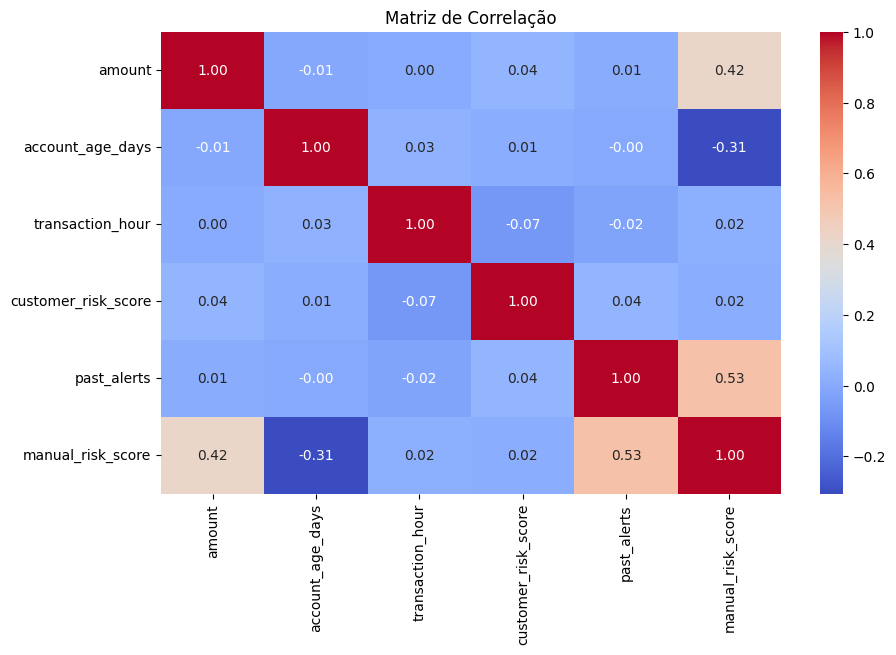

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

### Próximos passos:
- Criar score manual de risco com base em regras simples
- Gerar coluna `manual_risk_score`
- Analisar comportamento de alto risco

<ipython-input-58-972bf4cdb2a1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='risk_level', data=df, palette=palette)


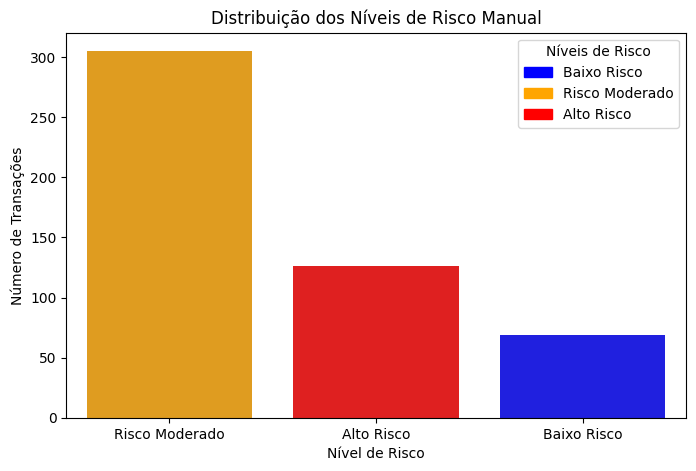

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

# Criar uma nova coluna para categorizar o risco manual em níveis
def categorize_risk(score):
    if score == 0:
        return 'Baixo Risco'
    elif 1 <= score <= 2:
        return 'Risco Moderado'
    else:
        return 'Alto Risco'

df['risk_level'] = df['manual_risk_score'].apply(categorize_risk)

# Definir cores para cada nível
palette = {
    'Baixo Risco': 'blue',
    'Risco Moderado': 'orange',
    'Alto Risco': 'red'
}

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='risk_level', data=df, palette=palette)
plt.title('Distribuição dos Níveis de Risco Manual')
plt.xlabel('Nível de Risco')
plt.ylabel('Número de Transações')

# Criar legenda automática com as cores usadas
handles = [mpatches.Patch(color=color, label=label) for label, color in palette.items()]
plt.legend(handles=handles, title='Níveis de Risco')

plt.show()


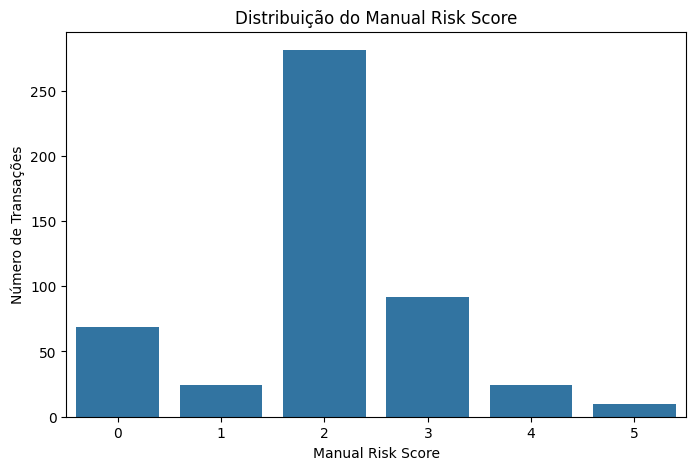

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='manual_risk_score', data=df)
plt.title('Distribuição do Manual Risk Score')
plt.xlabel('Manual Risk Score')
plt.ylabel('Número de Transações')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Selecionar as features que vamos usar no modelo (apenas numéricas)
features = ['amount', 'account_age_days', 'transaction_hour', 'past_alerts']

# Variável alvo: vamos tentar prever se a transação tem alto risco manual (por exemplo, manual_risk_score >= 3)
df['high_risk'] = (df['manual_risk_score'] >= 3).astype(int)

X = df[features]
y = df['high_risk']

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Avaliar o modelo
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        78
           1       1.00      0.95      0.98        22

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

ROC-AUC: 0.9994172494172495


<Figure size 640x480 with 0 Axes>

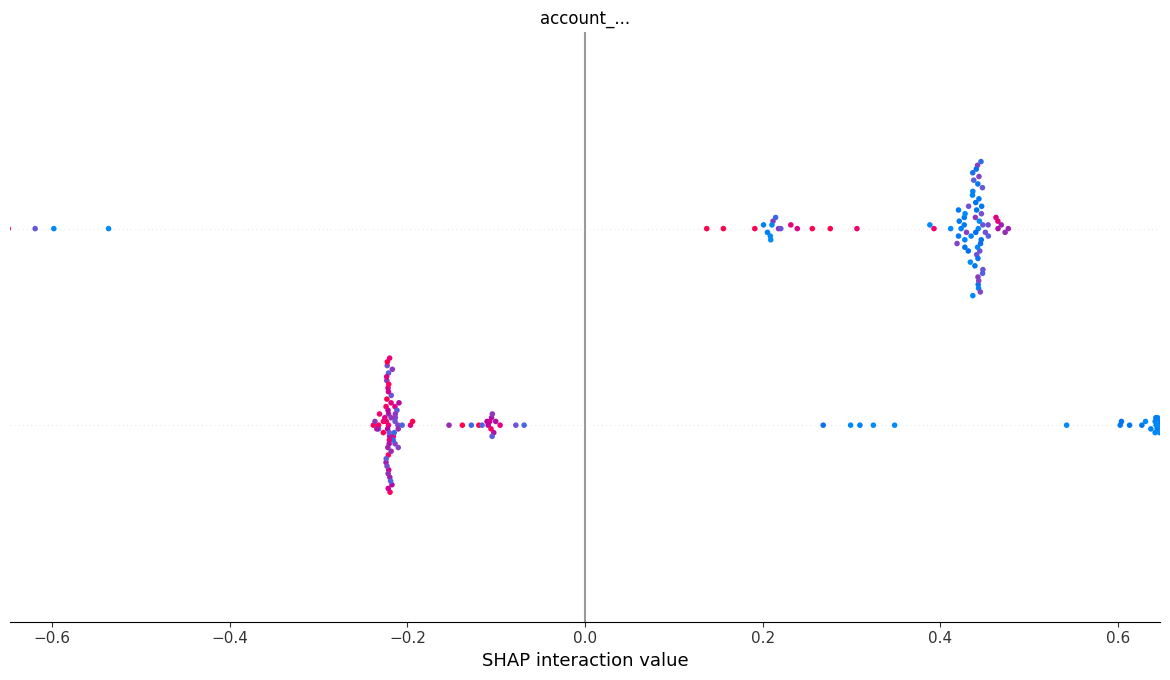

In [ ]:
import shap

# Criar o objeto explainer para Random Forest
explainer = shap.TreeExplainer(model)

# Calcular os valores SHAP para o conjunto de teste
shap_values = explainer.shap_values(X_test)

# Para modelos binários, shap_values é uma lista com duas matrizes (classe 0 e 1)
# Vamos usar a classe 1 (alto risco) para a visualização
shap.summary_plot(shap_values, X_test)



In [ ]:
!pip install --upgrade shap


In [ ]:
# Import necessary libraries for data handling, modeling, and SHAP explainability
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/a-bucci/AML---Fraud---AI---Portfolio/main/1_fiat_analysis/aml_fraud_risk_simulated_v1.csv'

df = pd.read_csv(url)

print(df.head())


  transaction_id   amount  account_age_days  transaction_hour  \
0          T0000   938.54               531                 6   
1          T0001  6020.24               988                16   
2          T0002  2633.49              1198                19   
3          T0003  1825.89              1254                 8   
4          T0004   339.25               958                16   

   customer_risk_score origin_country destination_country device_type  \
0                   69             RU                  RU      mobile   
1                   82             FR                  MX     desktop   
2                   29             BR                  RU     desktop   
3                   70             NG                  MX      mobile   
4                   73             NG                  US      mobile   

   past_alerts  
0            3  
1            0  
2            2  
3            2  
4            1  


In [ ]:
# 1. Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# 2. Carregar os dados (substitua o URL pelo seu correto)
url = 'https://raw.githubusercontent.com/a-bucci/AML---Fraud---AI---Portfolio/main/1_fiat_analysis/aml_fraud_risk_simulated_v1.csv'
df = pd.read_csv(url)

# 3. Criar a coluna 'is_flagged' com base em regras simples para simular fraudes
df['is_flagged'] = (
    (df['amount'] > 1000) |
    (df['customer_risk_score'] > 80) |
    (df['past_alerts'] > 3) |
    ((df['origin_country'] != df['destination_country']) & (df['account_age_days'] < 180))
).astype(int)

# 4. Preparar features e target
X = df.drop(columns=['transaction_id', 'is_flagged'])
y = df['is_flagged']

# 5. Transformar variáveis categóricas em numéricas (one-hot encoding)
X = pd.get_dummies(X)

# 6. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Treinar modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

# 8. Avaliar com SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test)
plt.show()


Modelo treinado com sucesso!


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [ ]:
# (Código para treinar o modelo aqui)
model.fit(X_train, y_train)
print("Modelo treinado com sucesso!")

# Agora, código SHAP atualizado
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


Modelo treinado com sucesso!


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [ ]:
# Criar coluna alvo 'is_flagged' conforme antes
df['is_flagged'] = (
    (df['amount'] > 1000) |
    (df['customer_risk_score'] > 80) |
    (df['past_alerts'] > 3) |
    ((df['origin_country'] != df['destination_country']) & (df['account_age_days'] < 180))
).astype(int)

# Separar features e target
X = df.drop(columns=['transaction_id', 'is_flagged'])
y = df['is_flagged']

# Transformar variáveis categóricas em numéricas antes do split
X = pd.get_dummies(X)

# Agora dividir em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

# Explicação SHAP usando a API atualizada
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


Modelo treinado com sucesso!


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [ ]:
# Criar is_flagged
df['is_flagged'] = (
    (df['amount'] > 1000) |
    (df['customer_risk_score'] > 80) |
    (df['past_alerts'] > 3) |
    ((df['origin_country'] != df['destination_country']) & (df['account_age_days'] < 180))
).astype(int)

# Aplicar get_dummies antes do split
X_full = pd.get_dummies(df.drop(columns=['transaction_id', 'is_flagged']))

y = df['is_flagged']

# Dividir dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Preencher nulos (se houver)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Treinar Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

# SHAP explainer atualizado
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


Modelo treinado com sucesso!


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [ ]:
import pandas as pd

# URL do seu arquivo atual no GitHub (sem is_flagged)
url = 'https://raw.githubusercontent.com/a-bucci/AML---Fraud---AI---Portfolio/main/1_fiat_analysis/aml_fraud_risk_simulated_v1.csv'
df = pd.read_csv(url)

# Criar a coluna is_flagged (label)
df['is_flagged'] = (
    (df['amount'] > 1000) |
    (df['customer_risk_score'] > 80) |
    (df['past_alerts'] > 3) |
    ((df['origin_country'] != df['destination_country']) & (df['account_age_days'] < 180))
).astype(int)

# Salvar o arquivo corrigido localmente no Colab
df.to_csv('aml_fraud_risk_simulated_v2.csv', index=False)

print("Arquivo corrigido criado: aml_fraud_risk_simulated_v2.csv")
print(df.head())


Arquivo corrigido criado: aml_fraud_risk_simulated_v2.csv
  transaction_id   amount  account_age_days  transaction_hour  \
0          T0000   938.54               531                 6   
1          T0001  6020.24               988                16   
2          T0002  2633.49              1198                19   
3          T0003  1825.89              1254                 8   
4          T0004   339.25               958                16   

   customer_risk_score origin_country destination_country device_type  \
0                   69             RU                  RU      mobile   
1                   82             FR                  MX     desktop   
2                   29             BR                  RU     desktop   
3                   70             NG                  MX      mobile   
4                   73             NG                  US      mobile   

   past_alerts  is_flagged  
0            3           0  
1            0           1  
2            2           

In [ ]:
from google.colab import files
files.download('aml_fraud_risk_simulated_v2.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/a-bucci/AML---Fraud---AI---Portfolio/main/1_fiat_analysis/aml_fraud_risk_simulated_v2.csv'
df = pd.read_csv(url)

print(df.head())


  transaction_id   amount  account_age_days  transaction_hour  \
0          T0000   938.54               531                 6   
1          T0001  6020.24               988                16   
2          T0002  2633.49              1198                19   
3          T0003  1825.89              1254                 8   
4          T0004   339.25               958                16   

   customer_risk_score origin_country destination_country device_type  \
0                   69             RU                  RU      mobile   
1                   82             FR                  MX     desktop   
2                   29             BR                  RU     desktop   
3                   70             NG                  MX      mobile   
4                   73             NG                  US      mobile   

   past_alerts  is_flagged  
0            3           0  
1            0           1  
2            2           1  
3            2           1  
4            1           

In [ ]:
# Criar as features e o target
X = df.drop(columns=['transaction_id', 'is_flagged'])
y = df['is_flagged']

# One-hot encode das variáveis categóricas
X = pd.get_dummies(X)

# Dividir em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")


Modelo treinado com sucesso!


In [ ]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [ ]:
print(X_train.dtypes[X_train.dtypes == 'object'])


Series([], dtype: object)


In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

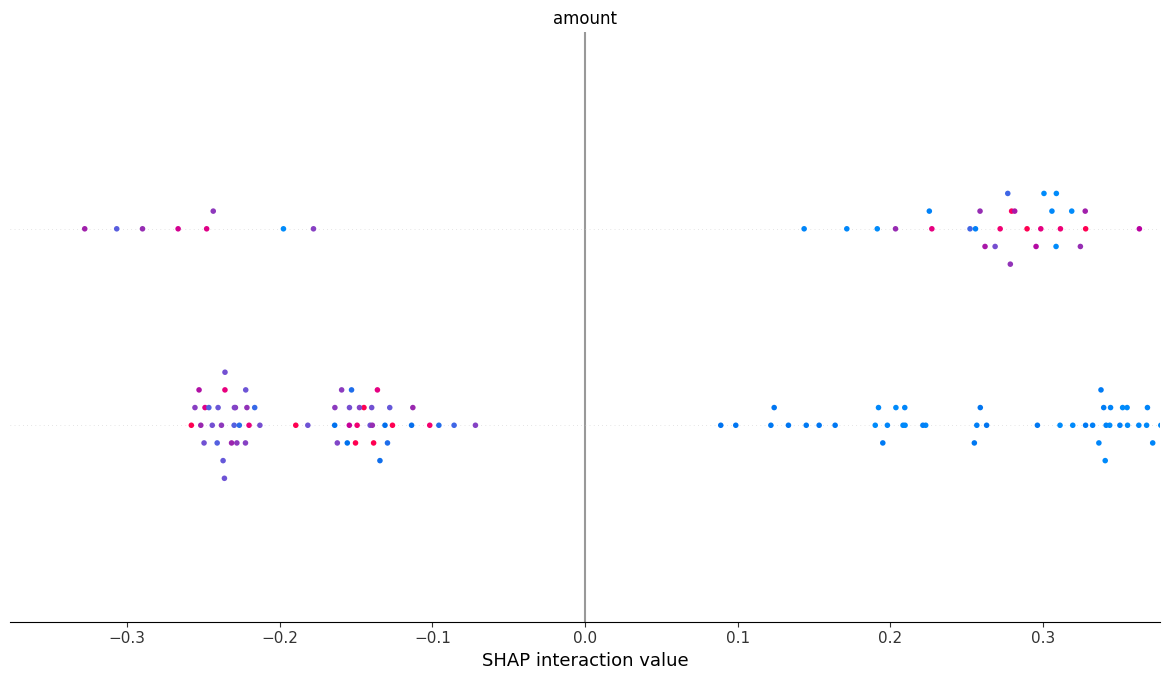

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Se for modelo binário, shap_values é lista com 2 arrays
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap.summary_plot(shap_values[1], X_test)
else:
    shap.summary_plot(shap_values, X_test)


In [ ]:
import shap

# Escolha uma amostra do teste
i = 0  # índice da amostra para analisar
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualizar a explicação para a amostra i (classe positiva)
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][i,:],
    X_test.iloc[i,:],
    matplotlib=True
)


DimensionError: Length of features is not equal to the length of shap_values!

In [ ]:
import shap

# Criar explainer e valores SHAP (já treinados)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Escolha uma amostra para explicar
i = 0

# Para exibir em Jupyter ou Colab, use o método HTML:
shap.initjs()
force_plot = shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][i,:],
    X_test.iloc[i,:]
)

force_plot


DimensionError: Length of features is not equal to the length of shap_values!

In [ ]:
print(f"X_test shape: {X_test.shape}")
print(f"shap_values[1][0] shape: {shap_values[1][0].shape}")
print(f"X_test type: {type(X_test)}")
print(f"X_test.iloc[0] shape: {X_test.iloc[0].shape}")
print(f"X_test.columns: {X_test.columns.tolist()}")


X_test shape: (100, 20)
shap_values[1][0] shape: (2,)
X_test type: <class 'pandas.core.frame.DataFrame'>
X_test.iloc[0] shape: (20,)
X_test.columns: ['amount', 'account_age_days', 'transaction_hour', 'customer_risk_score', 'past_alerts', 'origin_country_BR', 'origin_country_CN', 'origin_country_FR', 'origin_country_NG', 'origin_country_RU', 'origin_country_US', 'destination_country_BR', 'destination_country_CN', 'destination_country_IN', 'destination_country_MX', 'destination_country_RU', 'destination_country_US', 'device_type_desktop', 'device_type_mobile', 'device_type_tablet']


In [ ]:
import pandas as pd

if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X_train.columns)


In [ ]:
import shap
shap.initjs()

force_plot = shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][0],
    X_test.iloc[0].values,
    feature_names=X_test.columns.tolist()
)

force_plot


DimensionError: Length of features is not equal to the length of shap_values!

In [ ]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# shap_values.values tem o formato correto para force_plot
i = 0  # amostra 0
shap.initjs()

force_plot = shap.force_plot(
    explainer.expected_value,
    shap_values.values[i],
    X_test.iloc[i]
)

force_plot


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [ ]:
print(X_train.dtypes[X_train.dtypes == 'object'])


Series([], dtype: object)


In [ ]:
import shap

explainer = shap.TreeExplainer(model, data=X_train, feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test)


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [ ]:
print(X_train.head())


      amount  account_age_days  transaction_hour  customer_risk_score  \
249  3834.77               545                22                   43   
433   213.22               385                 4                   16   
19    688.45              1295                15                   67   
322  2158.78              1190                 2                   61   
332    29.00               827                14                   65   

     past_alerts  origin_country_BR  origin_country_CN  origin_country_FR  \
249            0              False              False              False   
433            0               True              False              False   
19             4               True              False              False   
322            3              False               True              False   
332            4              False              False               True   

     origin_country_NG  origin_country_RU  origin_country_US  \
249              False            

In [ ]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


In [ ]:
print(X_train.dtypes[X_train.dtypes == 'object'])


Series([], dtype: object)


In [ ]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [4]:
import pandas as pd

url = 'https://raw.githubusercontent.com/a-bucci/AML---Fraud---AI---Portfolio/main/1_fiat_analysis/aml_fraud_risk_simulated_v2.csv'
df = pd.read_csv(url)

print(df.head())


  transaction_id   amount  account_age_days  transaction_hour  \
0          T0000   938.54               531                 6   
1          T0001  6020.24               988                16   
2          T0002  2633.49              1198                19   
3          T0003  1825.89              1254                 8   
4          T0004   339.25               958                16   

   customer_risk_score origin_country destination_country device_type  \
0                   69             RU                  RU      mobile   
1                   82             FR                  MX     desktop   
2                   29             BR                  RU     desktop   
3                   70             NG                  MX      mobile   
4                   73             NG                  US      mobile   

   past_alerts  is_flagged  
0            3           0  
1            0           1  
2            2           1  
3            2           1  
4            1           

In [ ]:
url = 'https://raw.githubusercontent.com/a-bucci/AML---Fraud---AI---Portfolio/main/1_fiat_analysis/aml_fraud_risk_simulated_v2.csv'
df = pd.read_csv(url)

print(df.head())


  transaction_id   amount  account_age_days  transaction_hour  \
0          T0000   938.54               531                 6   
1          T0001  6020.24               988                16   
2          T0002  2633.49              1198                19   
3          T0003  1825.89              1254                 8   
4          T0004   339.25               958                16   

   customer_risk_score origin_country destination_country device_type  \
0                   69             RU                  RU      mobile   
1                   82             FR                  MX     desktop   
2                   29             BR                  RU     desktop   
3                   70             NG                  MX      mobile   
4                   73             NG                  US      mobile   

   past_alerts  is_flagged  
0            3           0  
1            0           1  
2            2           1  
3            2           1  
4            1           

In [ ]:
# Separar features (X) e target (y)
X = df.drop(columns=['transaction_id', 'is_flagged'])
y = df['is_flagged']

# Converter colunas categóricas em variáveis dummy (one-hot encoding)
X = pd.get_dummies(X)

print(X.head())


    amount  account_age_days  transaction_hour  customer_risk_score  \
0   938.54               531                 6                   69   
1  6020.24               988                16                   82   
2  2633.49              1198                19                   29   
3  1825.89              1254                 8                   70   
4   339.25               958                16                   73   

   past_alerts  origin_country_BR  origin_country_CN  origin_country_FR  \
0            3              False              False              False   
1            0              False              False               True   
2            2               True              False              False   
3            2              False              False              False   
4            1              False              False              False   

   origin_country_NG  origin_country_RU  origin_country_US  \
0              False               True              False  

In [5]:
from sklearn.model_selection import train_test_split

# Dividir em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Tamanho treino: {X_train.shape[0]} amostras")
print(f"Tamanho teste: {X_test.shape[0]} amostras")


NameError: name 'X' is not defined

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")


NameError: name 'X_train' is not defined

In [8]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test)


AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [10]:
print(type(shap_values))
print(len(shap_values) if isinstance(shap_values, list) else "não é lista")
print(shap_values[0].shape if isinstance(shap_values, list) else shap_values.shape)
print(X_test.shape)


NameError: name 'shap_values' is not defined

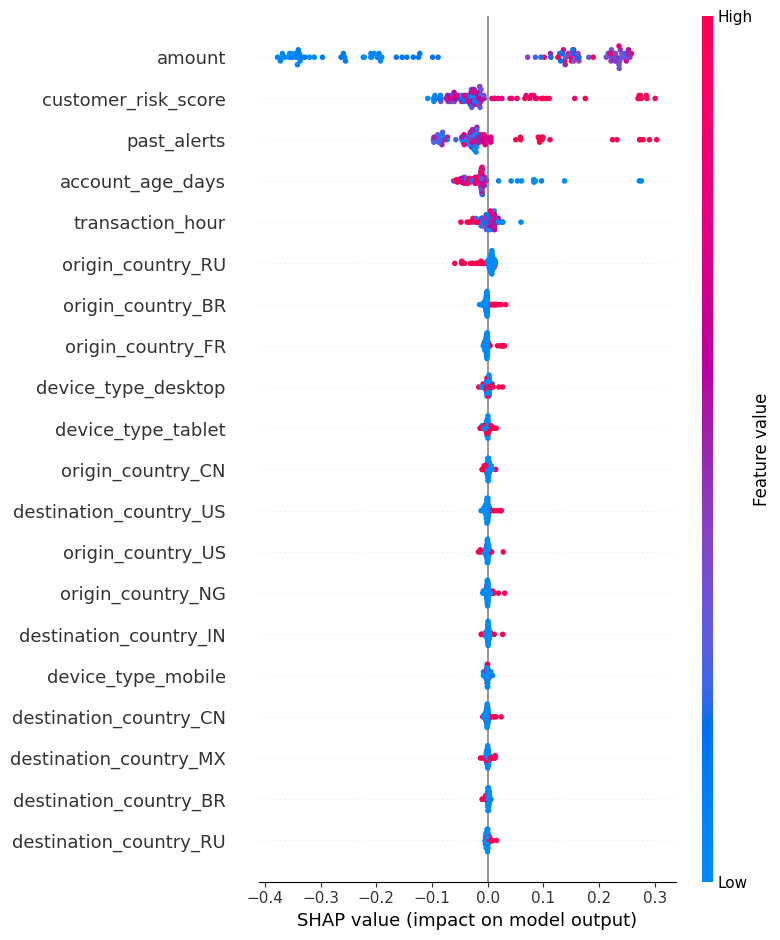

In [ ]:
# shap_values tem formato (100, 20, 2)
# Para pegar os valores da classe 1 (positiva), fazemos:

shap_values_pos = shap_values[:, :, 1]

# Agora plotar:
import shap
shap.summary_plot(shap_values_pos, X_test)


Passo a passo para visualizar transações específicas com SHAP force plot
Identifique as amostras de maior risco no conjunto de teste

Vamos pegar os índices das 3 transações com maior probabilidade prevista pelo modelo.

In [11]:
import numpy as np

# Obter as probabilidades preditas para a classe positiva (fraude)
probs = model.predict_proba(X_test)[:, 1]

# Pegar índices das top 3 transações com maior risco
top3_indices = np.argsort(probs)[-3:][::-1]

print("Índices das top 3 transações com maior risco:", top3_indices)


NameError: name 'X_test' is not defined

In [12]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Obter probabilidades para classe positiva
probs = model.predict_proba(X_test)[:, 1]

# Índices das top 3 amostras de maior risco
top3_indices = probs.argsort()[-3:][::-1]

for i in top3_indices:
    print(f"Transação índice {i} com risco {probs[i]:.4f}")
    shap.force_plot(
        explainer.expected_value[1],
        shap_values[1][i],
        X_test.iloc[i],
        matplotlib=False
    )


AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")


NameError: name 'X_train' is not defined

Dados carregados:
  transaction_id   amount  account_age_days  transaction_hour  \
0          T0000   938.54               531                 6   
1          T0001  6020.24               988                16   
2          T0002  2633.49              1198                19   
3          T0003  1825.89              1254                 8   
4          T0004   339.25               958                16   

   customer_risk_score origin_country destination_country device_type  \
0                   69             RU                  RU      mobile   
1                   82             FR                  MX     desktop   
2                   29             BR                  RU     desktop   
3                   70             NG                  MX      mobile   
4                   73             NG                  US      mobile   

   past_alerts  is_flagged  
0            3           0  
1            0           1  
2            2           1  
3            2           1  
4      

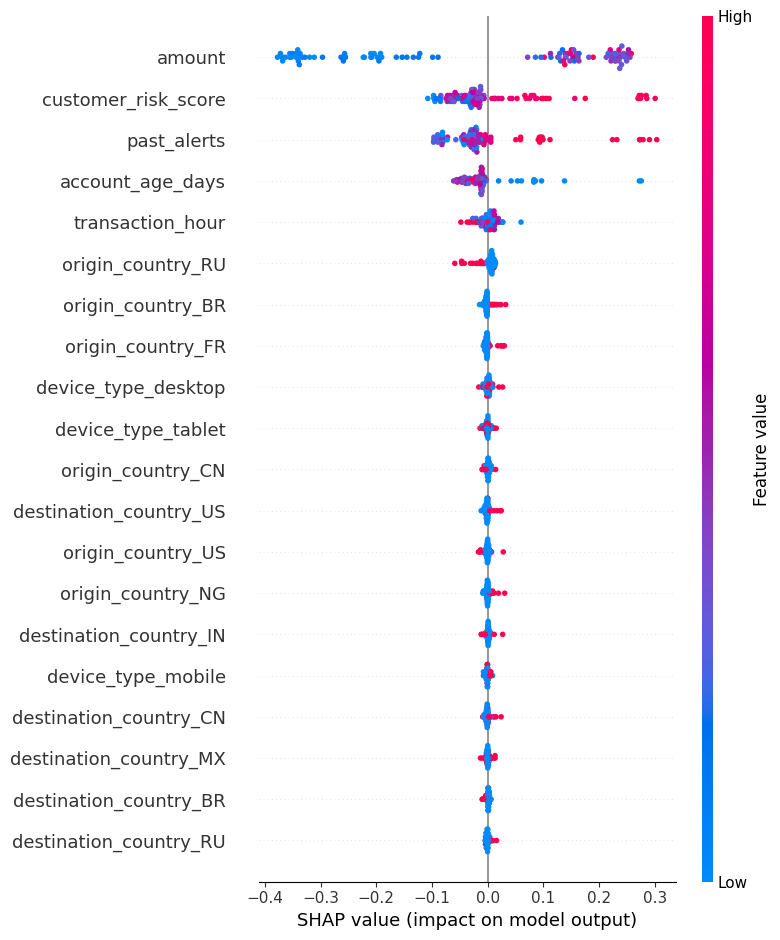

Top 3 transações com maior risco: [98 83 19]


Explicação para transação índice 98 com risco 1.0000


Explicação para transação índice 83 com risco 1.0000


Explicação para transação índice 19 com risco 1.0000


In [16]:
# 1. Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

# 2. Carregar dataset corrigido do seu GitHub
url = 'https://raw.githubusercontent.com/a-bucci/AML---Fraud---AI---Portfolio/main/1_fiat_analysis/aml_fraud_risk_simulated_v2.csv'
df = pd.read_csv(url)

print("Dados carregados:")
print(df.head())

# 3. Separar features e target
X = df.drop(columns=['transaction_id', 'is_flagged'])
y = df['is_flagged']

# 4. One-hot encoding para variáveis categóricas
X = pd.get_dummies(X)

# 5. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho treino: {X_train.shape[0]} amostras")
print(f"Tamanho teste: {X_test.shape[0]} amostras")

# 6. Treinar modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

# 7. Explicabilidade com SHAP — gráfico resumo global
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# shap_values tem forma (n_amostras, n_features, n_classes)
# Para a classe positiva (índice 1), pegamos:
shap.summary_plot(shap_values[:, :, 1], X_test)


# 8. Identificar top 3 amostras com maior risco para gráficos individuais
import numpy as np

probs = model.predict_proba(X_test)[:, 1]
top3_indices = np.argsort(probs)[-3:][::-1]
print("Top 3 transações com maior risco:", top3_indices)

# 9. Gráficos SHAP individuais para as top 3 transações
shap.initjs()
for i in top3_indices:
    print(f"Explicação para transação índice {i} com risco {probs[i]:.4f}")
    display(shap.force_plot(
    explainer.expected_value[1],
    shap_values[i, :, 1],
    X_test.iloc[i, :],
    matplotlib=False
)
    )


In [17]:
import numpy as np

# Probabilidades previstas (classe positiva)
probs = model.predict_proba(X_test)[:, 1]

# Índices ordenados por risco crescente
sorted_indices = np.argsort(probs)

# Calcular intervalo para pegar 3 transações de risco médio (por exemplo, central)
middle_start = len(sorted_indices) // 2 - 1  # começa um pouco antes do meio
middle_indices = sorted_indices[middle_start:middle_start+3]

print("Índices das 3 transações de risco médio:", middle_indices)

# Mostrar gráficos SHAP para essas transações
shap.initjs()
for i in middle_indices:
    print(f"Explicação para transação índice {i} com risco {probs[i]:.4f}")
    display(shap.force_plot(
        explainer.expected_value[1],
        shap_values[i, :, 1],
        X_test.iloc[i, :],
        matplotlib=False
    ))


Índices das 3 transações de risco médio: [70 72  4]


Explicação para transação índice 70 com risco 0.9200


Explicação para transação índice 72 com risco 0.9200


Explicação para transação índice 4 com risco 0.9200


In [18]:
import numpy as np

# Probabilidades previstas (classe positiva)
probs = model.predict_proba(X_test)[:, 1]

# Índices ordenados por risco crescente (do menor para maior)
sorted_indices = np.argsort(probs)

# Pegar os 3 índices com menor risco (início do array)
low_risk_indices = sorted_indices[:3]

print("Índices das 3 transações de baixíssimo risco:", low_risk_indices)

# Mostrar gráficos SHAP para essas transações
shap.initjs()
for i in low_risk_indices:
    print(f"Explicação para transação índice {i} com risco {probs[i]:.4f}")
    display(shap.force_plot(
        explainer.expected_value[1],
        shap_values[i, :, 1],
        X_test.iloc[i, :],
        matplotlib=False
    ))


Índices das 3 transações de baixíssimo risco: [ 2 36 29]


Explicação para transação índice 2 com risco 0.0800


Explicação para transação índice 36 com risco 0.0900


Explicação para transação índice 29 com risco 0.1700


In [19]:
import numpy as np
import shap

probs = model.predict_proba(X_test)[:, 1]
sorted_indices = np.argsort(probs)

# Top 3 alto risco
high_risk_indices = sorted_indices[-3:][::-1]

# 3 risco médio - centralizando no meio do array
middle_start = len(sorted_indices) // 2 - 1
medium_risk_indices = sorted_indices[middle_start:middle_start+3]

# 3 baixo risco - começo do array
low_risk_indices = sorted_indices[:3]

# Todos juntos
all_indices = np.concatenate([high_risk_indices, medium_risk_indices, low_risk_indices])

print("Índices das transações (alto, médio e baixo risco):", all_indices)

shap.initjs()
for i in all_indices:
    print(f"Transação índice {i} — risco {probs[i]:.4f}")
    display(shap.force_plot(
        explainer.expected_value[1],
        shap_values[i, :, 1],
        X_test.iloc[i, :],
        matplotlib=False
    ))


Índices das transações (alto, médio e baixo risco): [98 83 19 70 72  4  2 36 29]


Transação índice 98 — risco 1.0000


Transação índice 83 — risco 1.0000


Transação índice 19 — risco 1.0000


Transação índice 70 — risco 0.9200


Transação índice 72 — risco 0.9200


Transação índice 4 — risco 0.9200


Transação índice 2 — risco 0.0800


Transação índice 36 — risco 0.0900


Transação índice 29 — risco 0.1700
